# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("dark")
plt.rcParams['figure.figsize'] = (10, 6)

### Read Data

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
104,105,3,nissan teana,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3071,ohcv,six,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199.0
190,191,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980.0
102,103,0,nissan fuga,gas,std,four,wagon,fwd,front,100.4,184.6,66.5,56.1,3296,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# check the number of rows in the data
df.shape

(205, 26)

In [5]:
#check for nulls
nulls_count = df.isnull().sum()
total = df.shape[0]
precent_of_nulls= (nulls_count / total)
null= pd.DataFrame({"Nulls Count" : nulls_count, "Nulls %" : precent_of_nulls}).T
null

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Nulls Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nulls %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Note:** The dataset is clean with no missing values.

In [6]:
# check the number of unique values of each column
for col in df.columns :
    print(f"{col} : {df[col].nunique()}  ({df[col].dtype})")
    

car_ID : 205  (int64)
symboling : 6  (int64)
CarName : 147  (object)
fueltype : 2  (object)
aspiration : 2  (object)
doornumber : 2  (object)
carbody : 5  (object)
drivewheel : 3  (object)
enginelocation : 2  (object)
wheelbase : 53  (float64)
carlength : 75  (float64)
carwidth : 44  (float64)
carheight : 49  (float64)
curbweight : 171  (int64)
enginetype : 7  (object)
cylindernumber : 7  (object)
enginesize : 44  (int64)
fuelsystem : 8  (object)
boreratio : 38  (float64)
stroke : 37  (float64)
compressionratio : 32  (float64)
horsepower : 59  (int64)
peakrpm : 23  (int64)
citympg : 29  (int64)
highwaympg : 30  (int64)
price : 189  (float64)


In [7]:
# breif statistics summary  of the  Numerical data
df.describe(include="number")

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# breif statistics summary  of the  Categorical data
df.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
# check for duplicats
df_without_id = df.drop('car_ID',axis=1)
df_without_id .duplicated().sum()

0

First, we dropped the ID column to avoid confusion when checking for duplicates. 

**Result:** There are no duplicates in the data.

In [10]:
# convert objects columns to category 
cat_col = df.select_dtypes(include="object").columns
df[cat_col] = df[cat_col].astype("category")
df.dtypes

car_ID                 int64
symboling              int64
CarName             category
fueltype            category
aspiration          category
doornumber          category
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber      category
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object

In [11]:
df= df.drop("car_ID",axis=1)


<p> We will not need the id column any more so i drop it</p>

In [12]:
# get the numerical columns in another variable
num_col = df.select_dtypes(include="number").columns


<Figure size 1000x800 with 0 Axes>

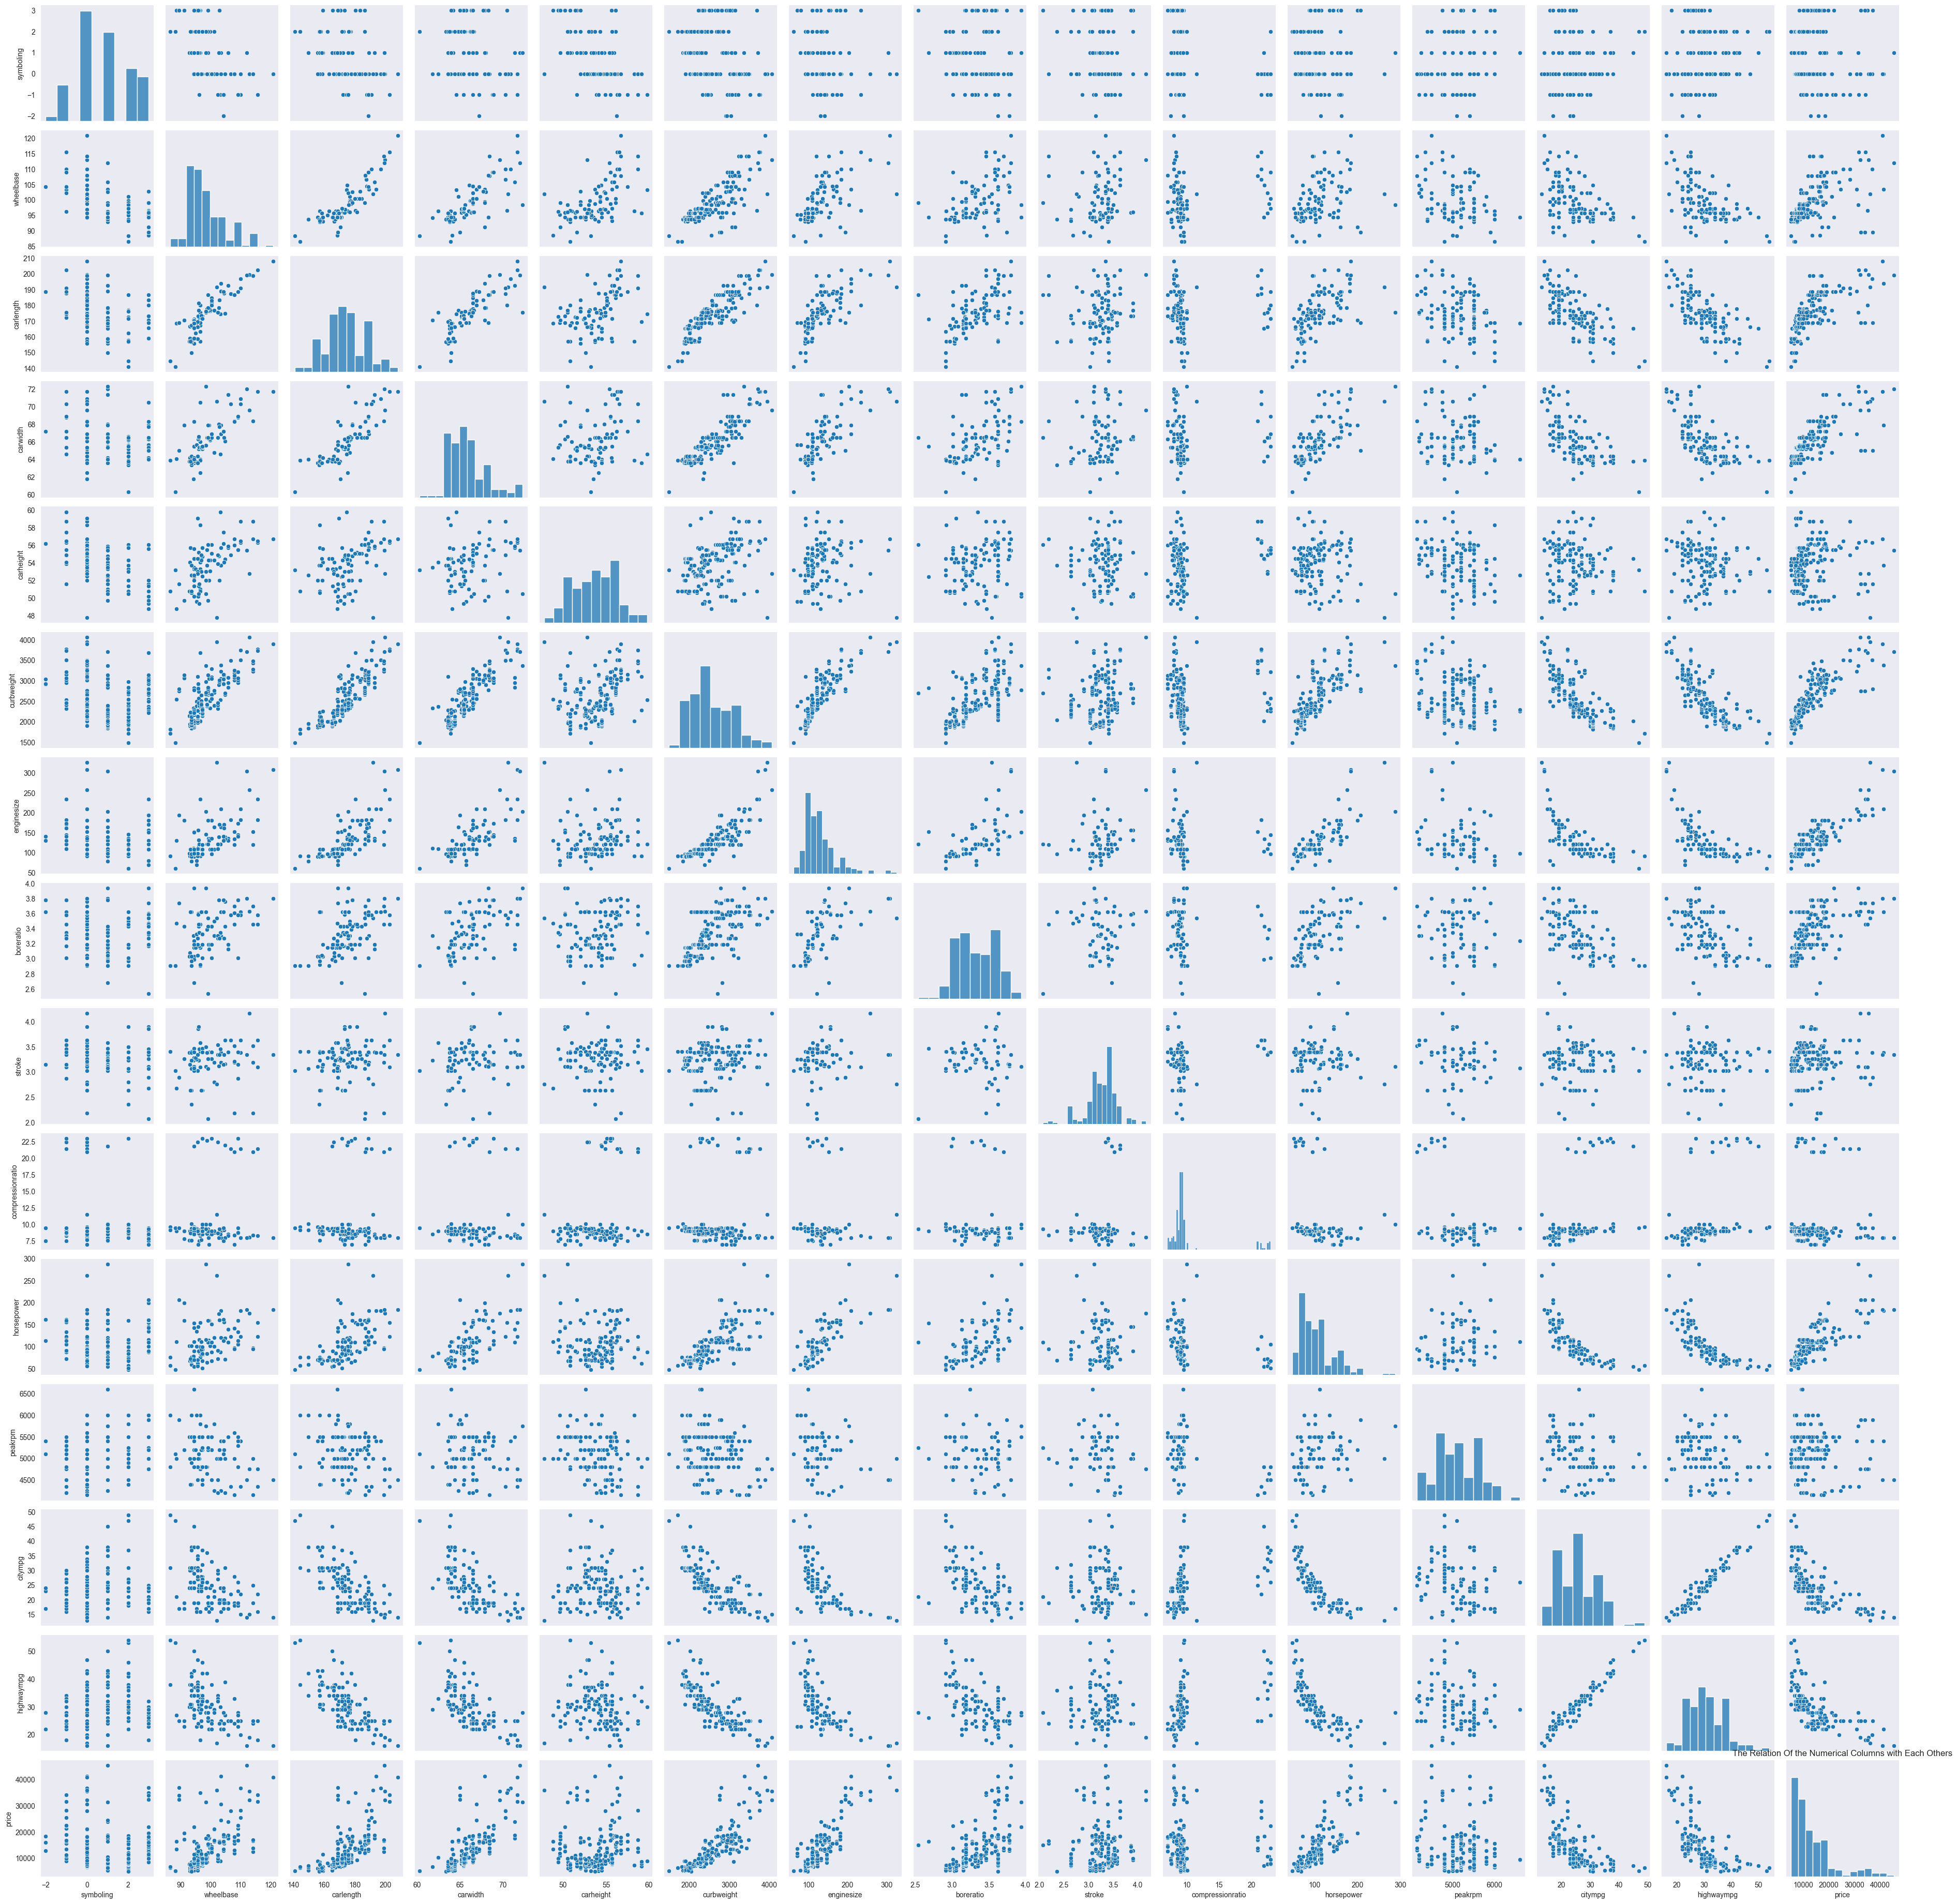

In [13]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df[num_col])
plt.title("The Relation Of the Numerical Columns with Each Others")
plt.show()

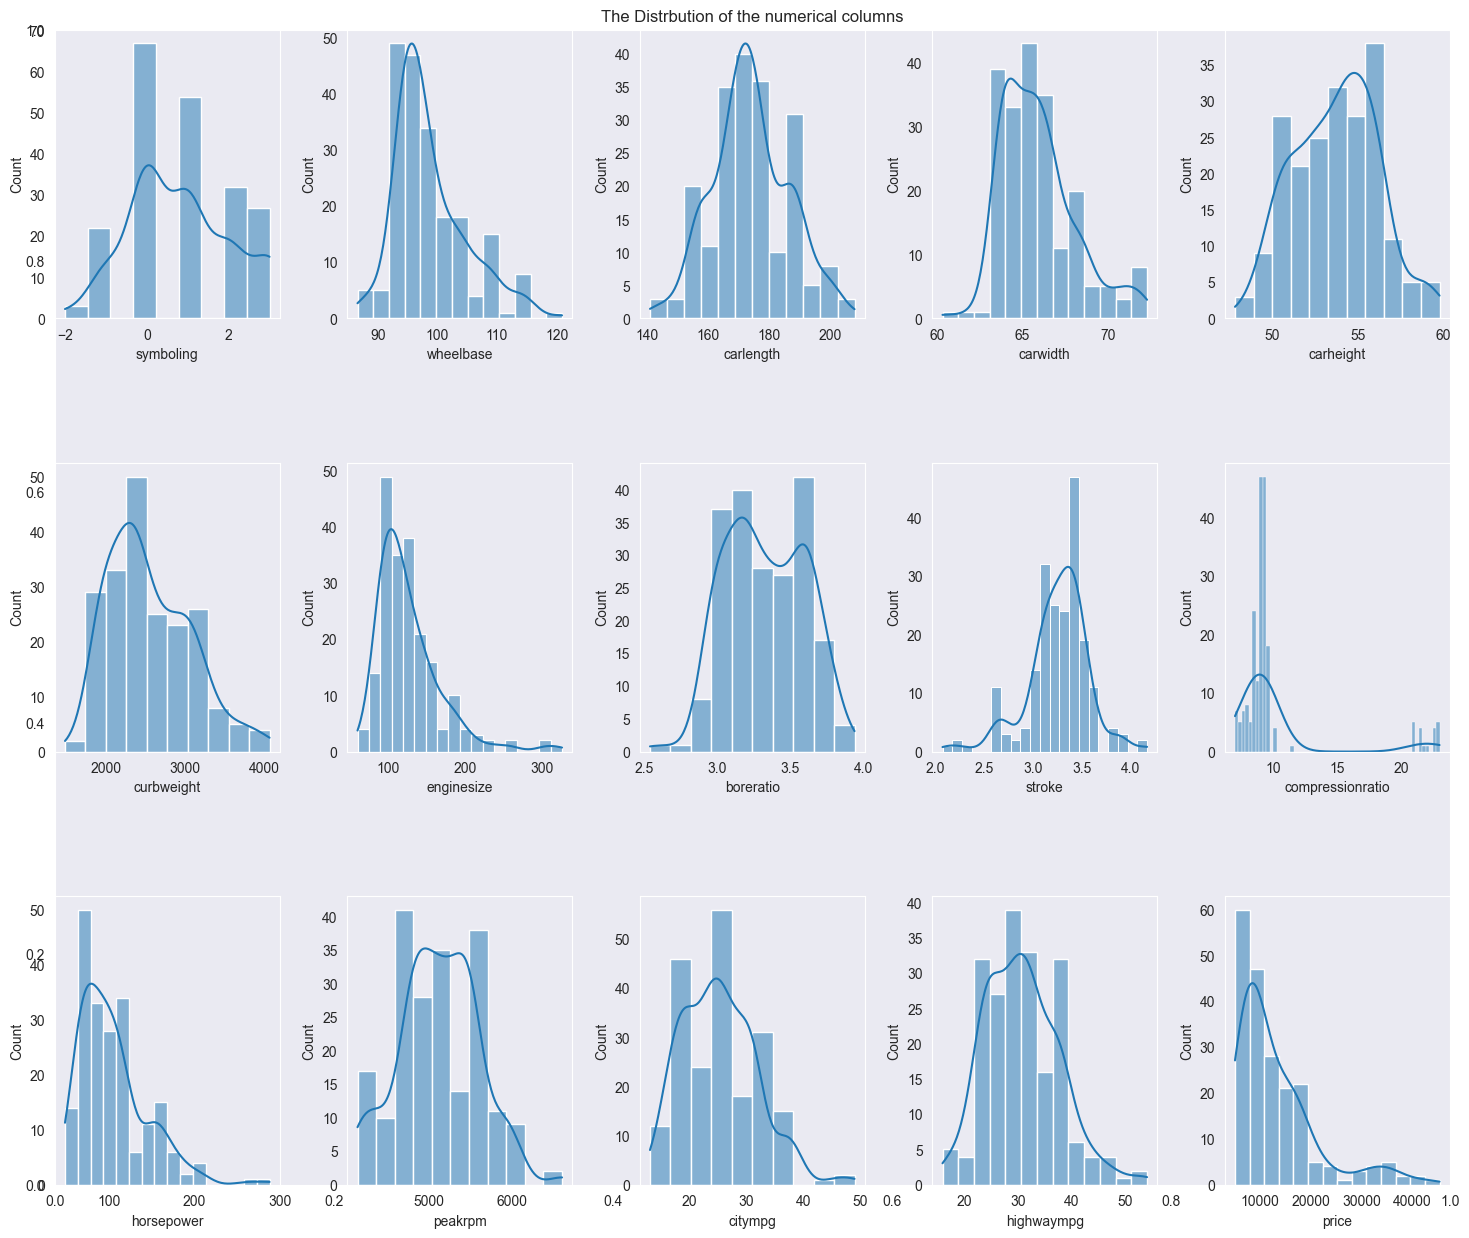

In [14]:
plt.figure(figsize=(18,15))
plt.title("The Distrbution of the numerical columns")
for index, col in enumerate(df[num_col], 1):
    plt.subplot(3, 5, index)
    sns.histplot(data=df, x=col, kde=True)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

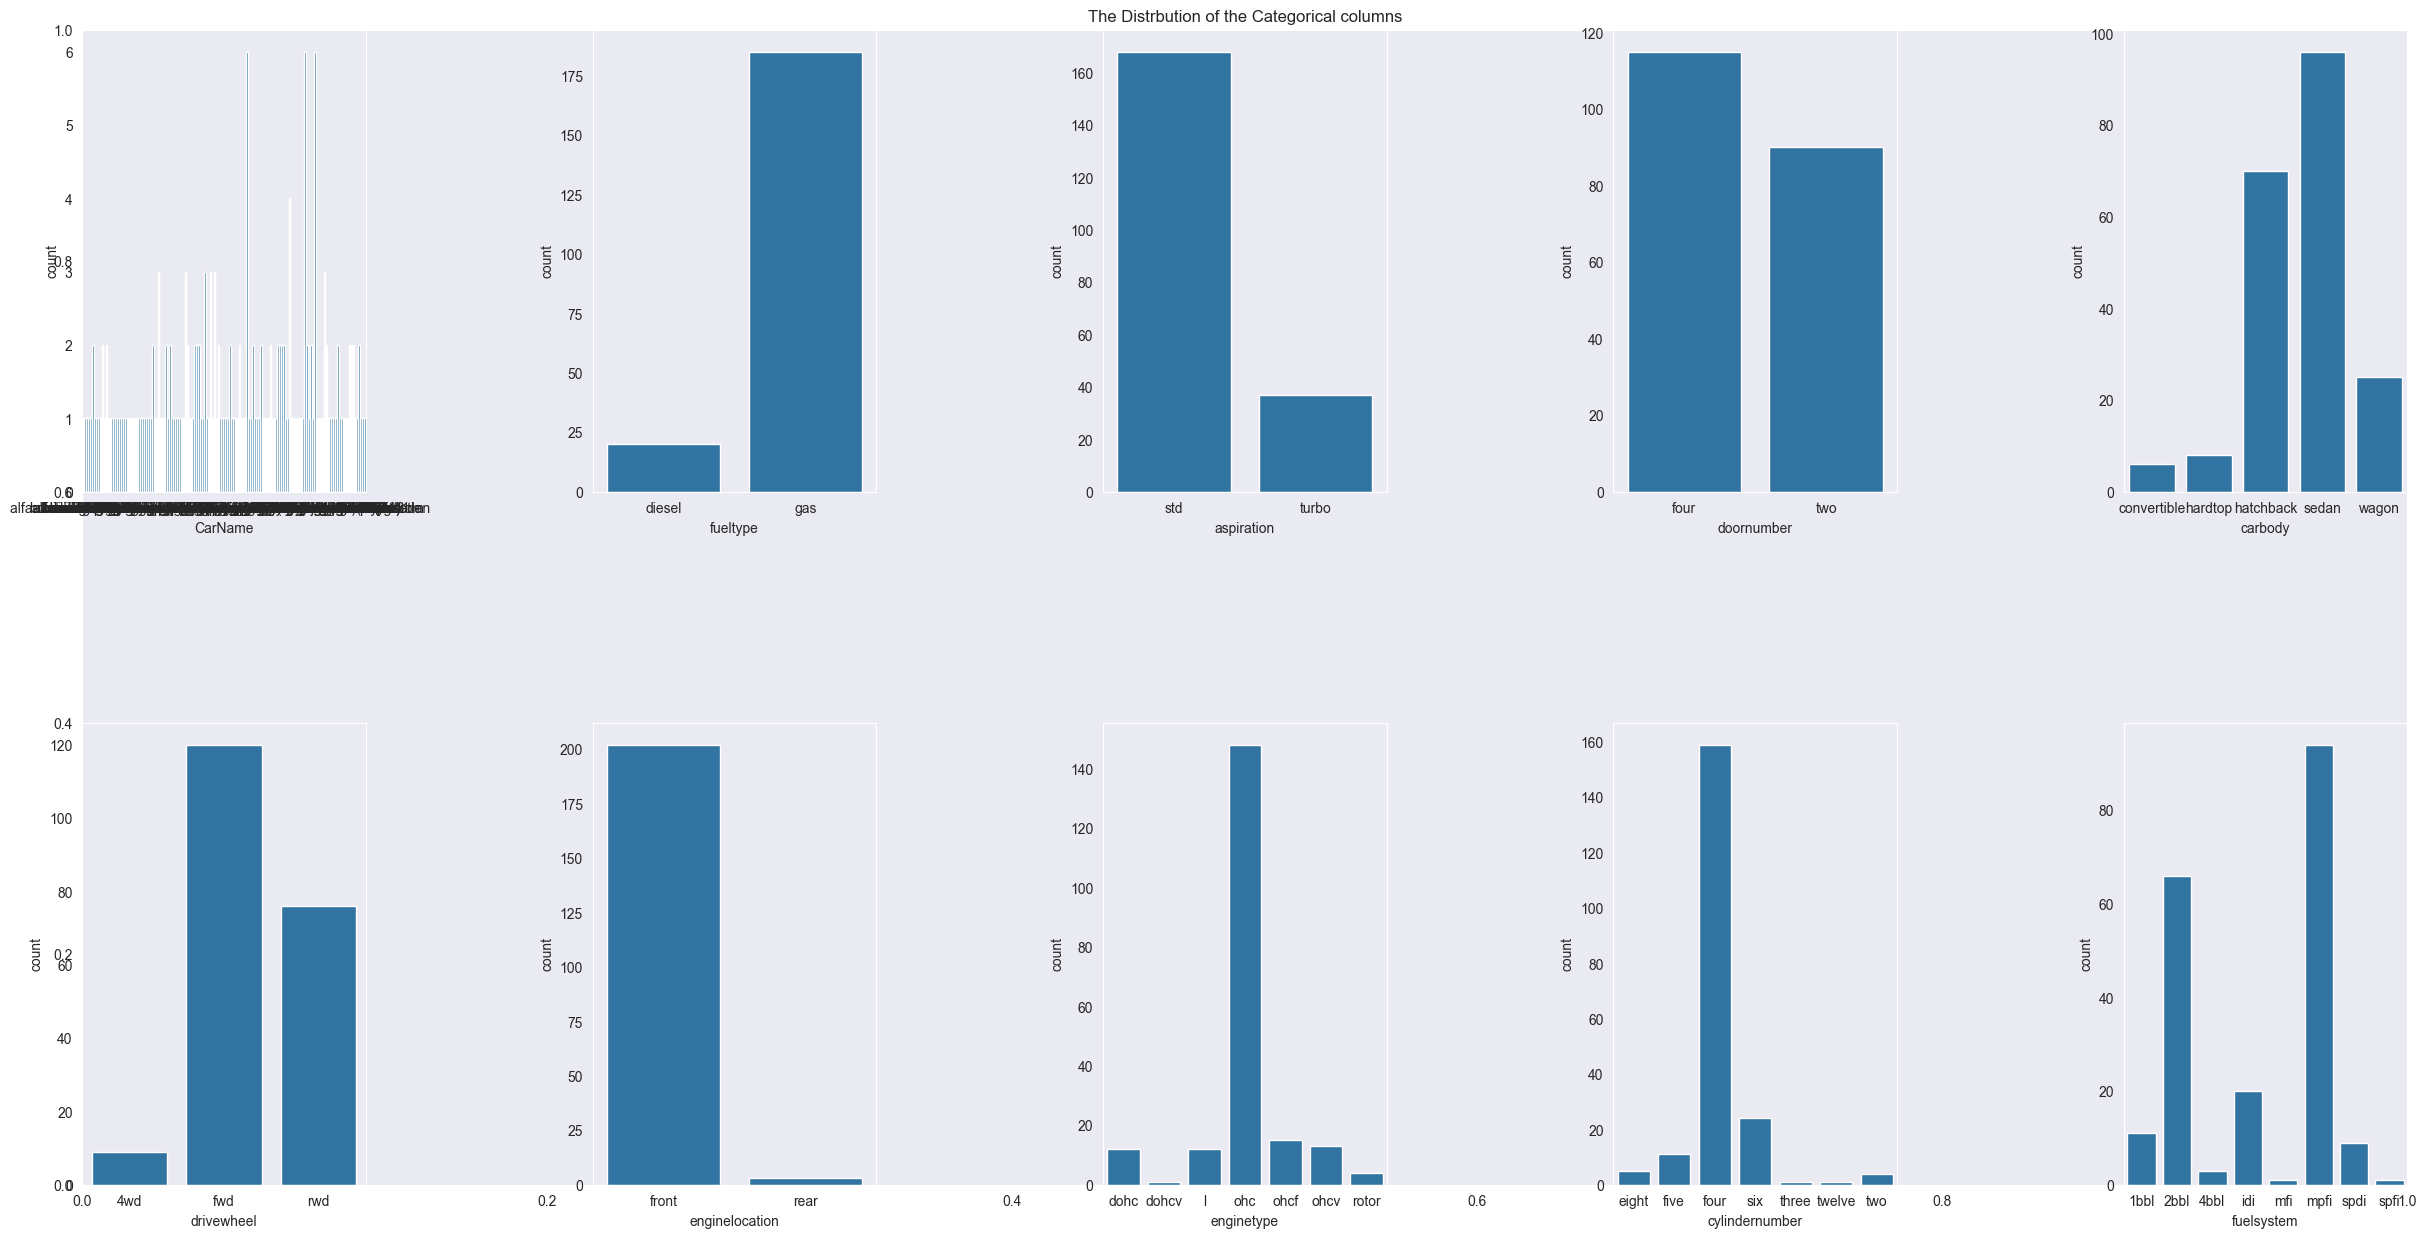

In [15]:
plt.figure(figsize=(30,15))
plt.title("The Distrbution of the Categorical columns")
for index, col in enumerate(df[cat_col], 1):
    plt.subplot(2, 5, index)
    sns.countplot(data=df, x=col)
plt.subplots_adjust(wspace=0.8, hspace=0.5)
plt.show()

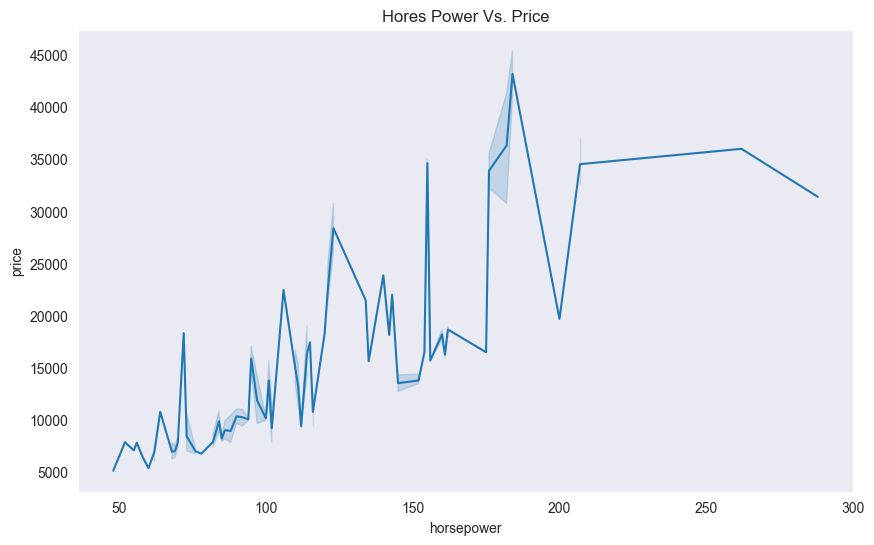

In [16]:
plt.title("Hores Power Vs. Price")
sns.lineplot(data=df,x=df['horsepower'],y=df['price'])
plt.show()

##### We notice that The more `horse power`, the more `price`

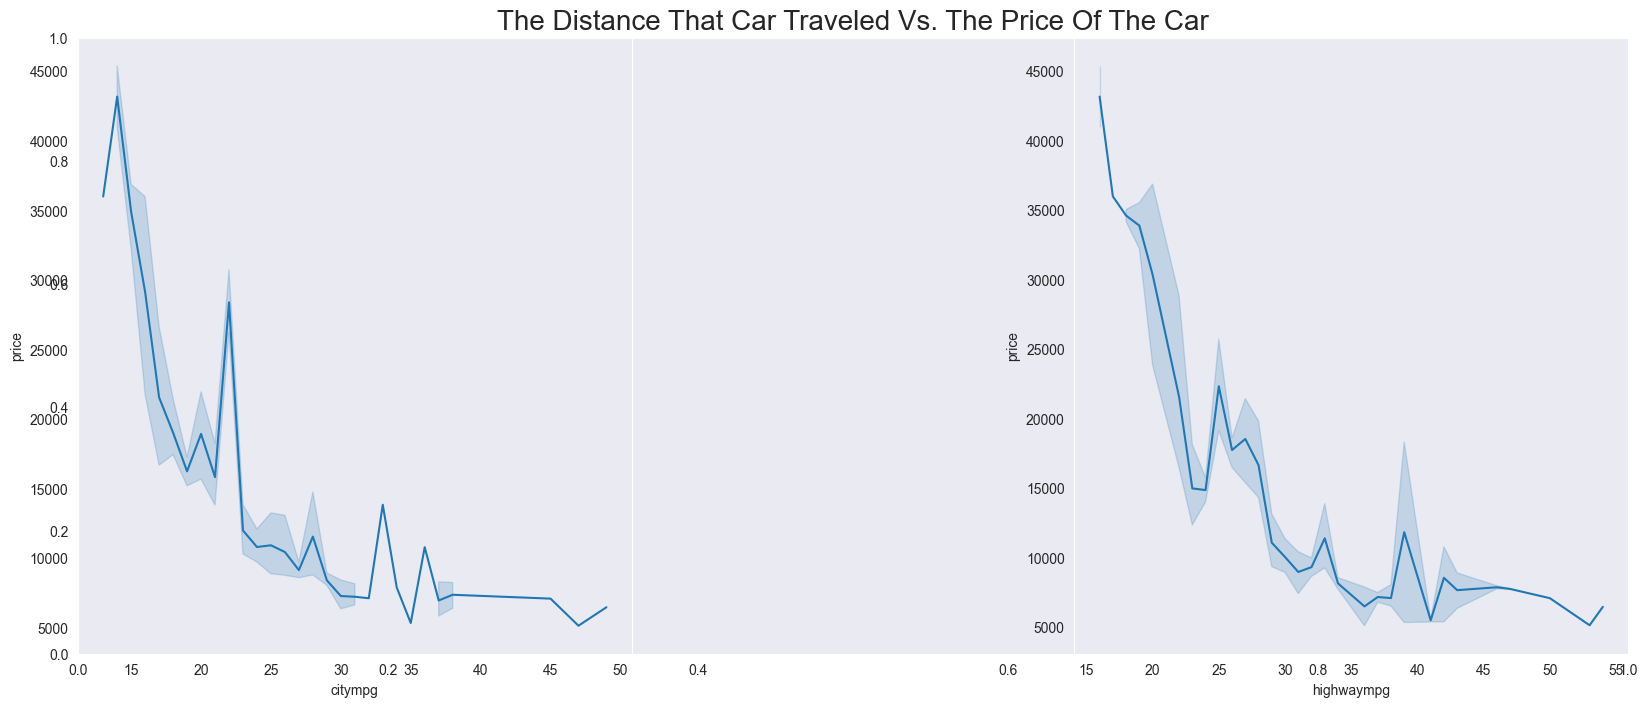

In [17]:
space = ['citympg','highwaympg']
plt.figure(figsize=(20,8))
plt.title("The Distance That Car Traveled Vs. The Price Of The Car",size=20)

for index,col in enumerate(df[space],1):
    plt.subplot(1,2,index)
    sns.lineplot(data=df,x=df[col],y="price")
plt.subplots_adjust(wspace=.8)


#####     The more the car traveld  the less the price 

<Axes: xlabel='enginetype', ylabel='enginesize'>

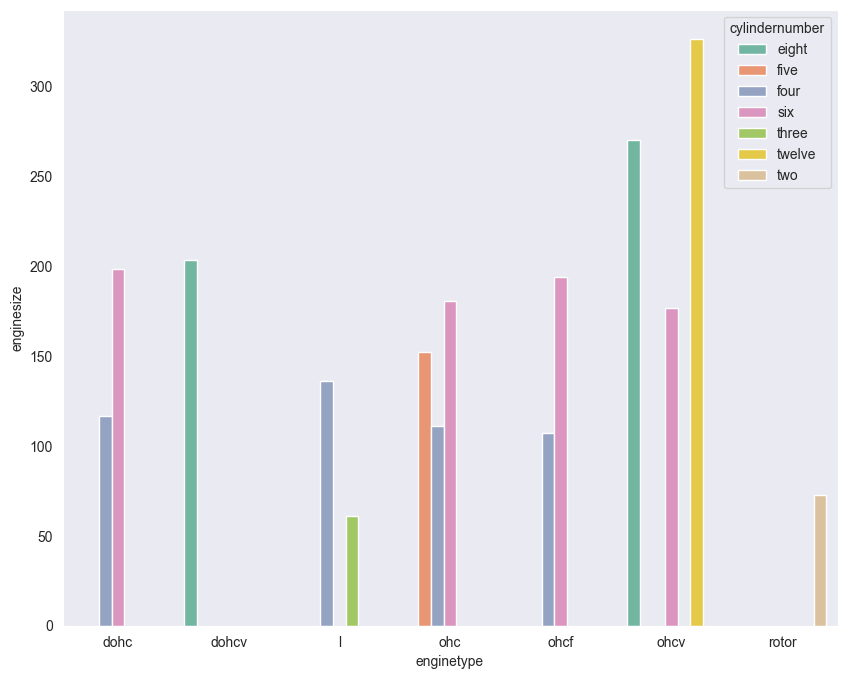

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='enginetype',y='enginesize',ci=None,palette='Set2',hue='cylindernumber')

<p> The size of the engine depeand on the engine type and the cylindernumber</p>

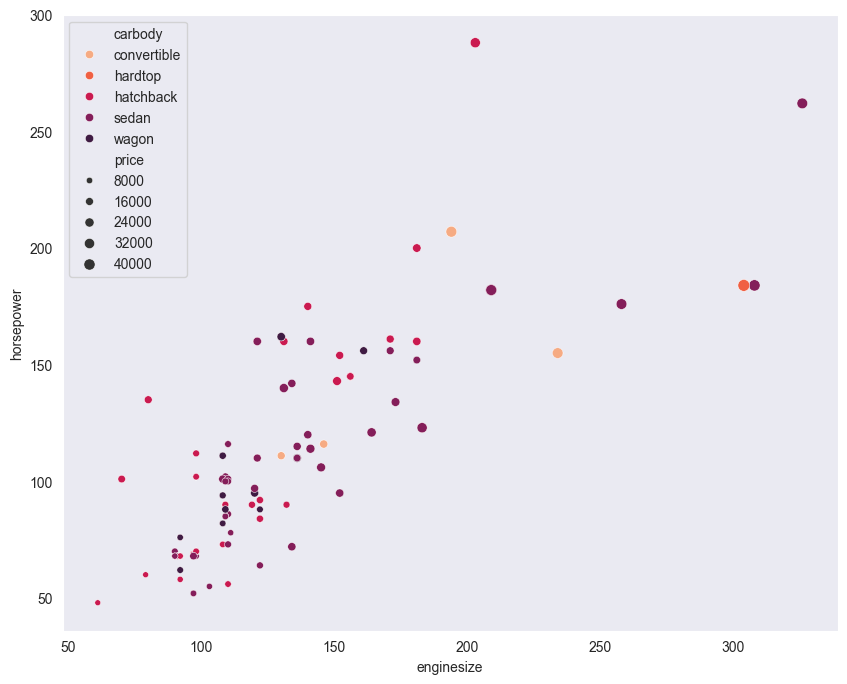

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x=df['enginesize'],y=df['horsepower'],hue=df['carbody'],size=df['price'],palette='rocket_r')
plt.show()


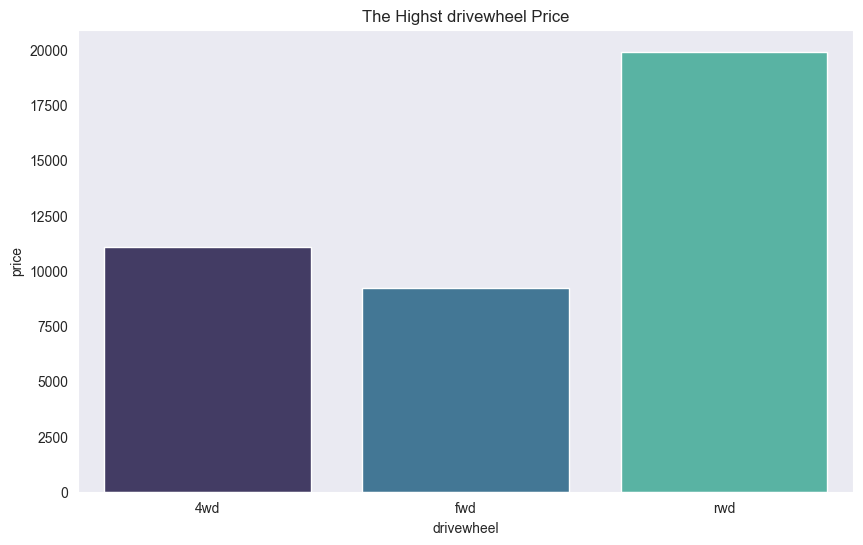

In [20]:
sns.barplot(data=df,x='drivewheel',y='price',ci=None,palette='mako')
plt.title("The Highst drivewheel Price")
plt.show()

###### `Note`: The rdw drivewheel is the hsighst price

In [21]:
fig =px.histogram(df['price'])
fig.show()



#### The Most of the Car Price IS Grater than 20k

In [22]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: xlabel='citympg', ylabel='highwaympg'>

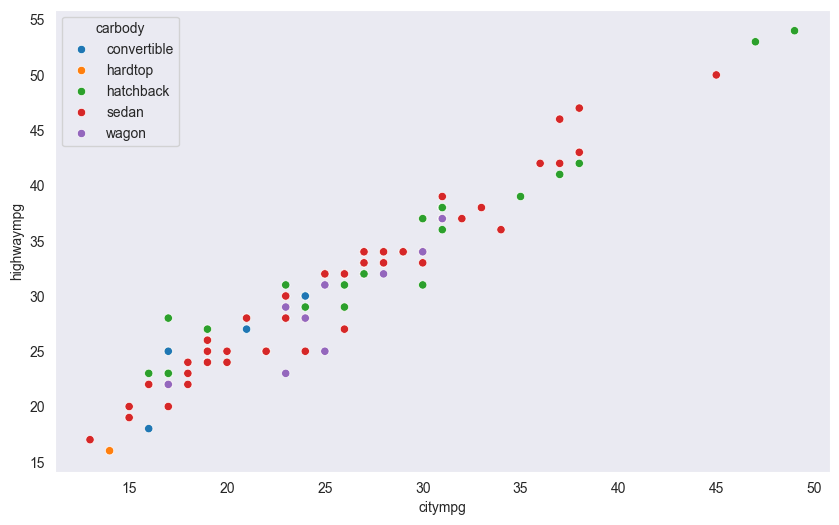

In [23]:
sns.scatterplot(data=df,x=df['citympg'],y=df['highwaympg'],hue=df['carbody'])

#### Check Outlires


<Axes: >

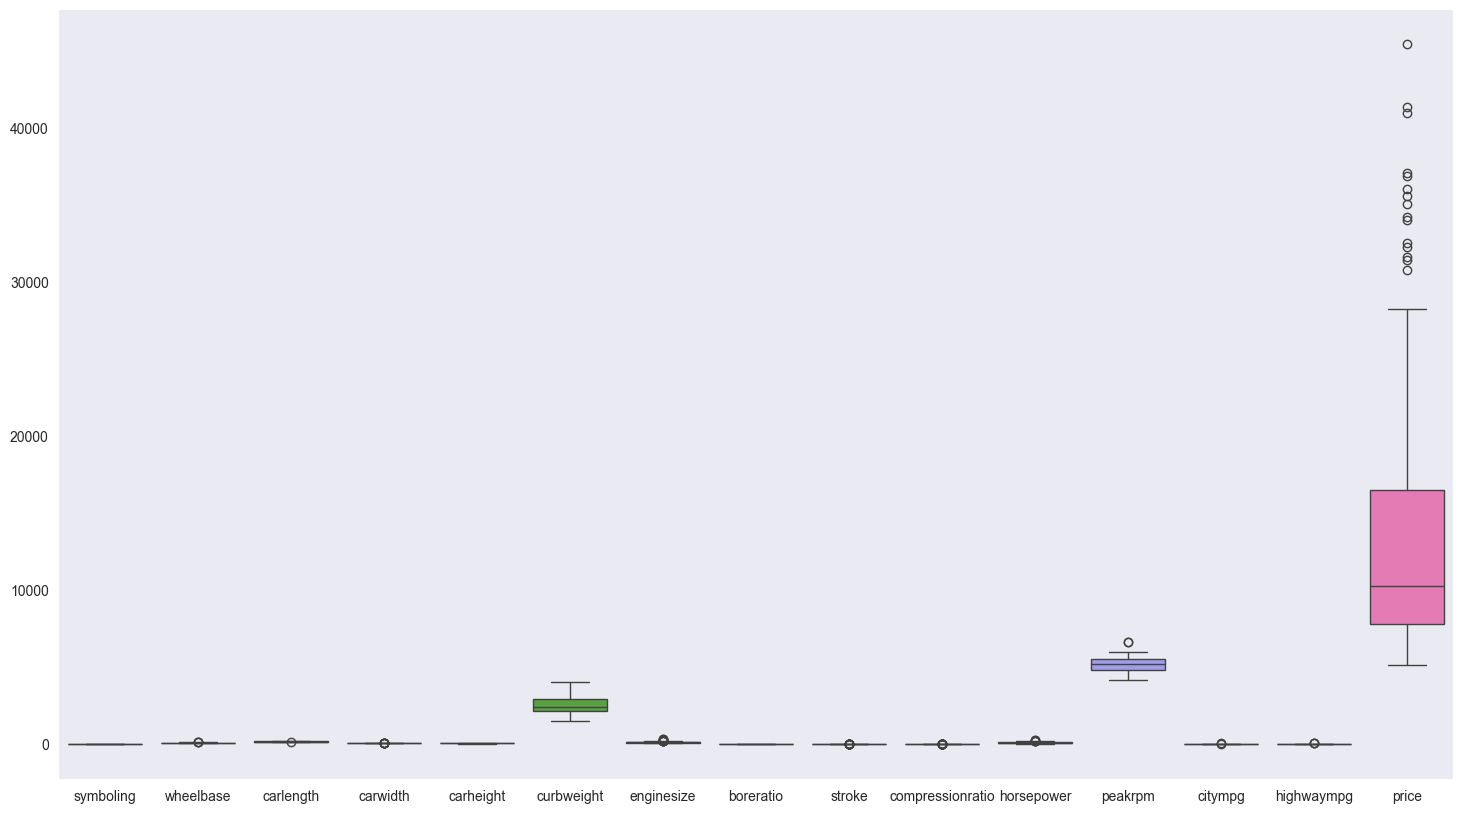

In [24]:
plt.figure(figsize=(18,10))
# for i,col in enumerate(df[num_col].columns,1):
#     plt.subplot(5,5,i)
sns.boxplot(data=df)

# Feature Engennering

Text(0.5, 1.0, 'Car_volume Vs. Price')

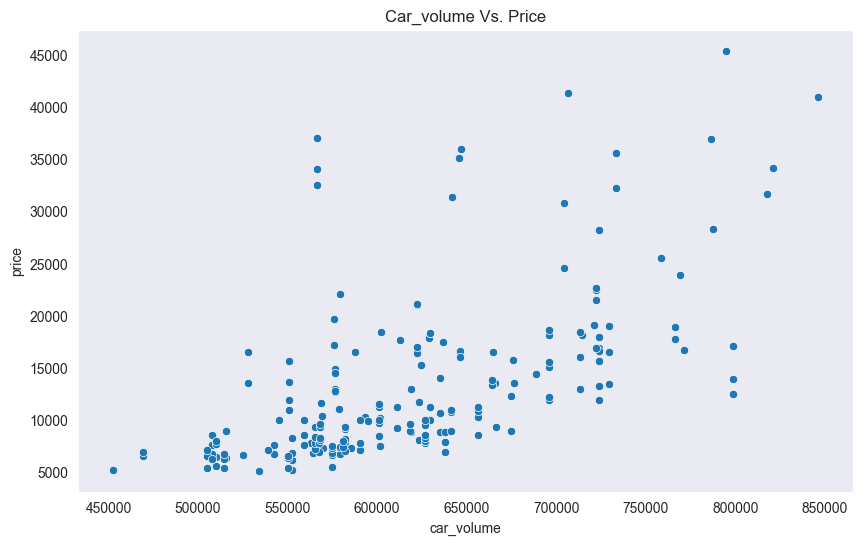

In [25]:
df['car_volume'] = df['carwidth']*df['carheight']*df['carlength']
sns.scatterplot(data=df,x=df['car_volume'],y=df['price'])
plt.title("Car_volume Vs. Price")


<Axes: >

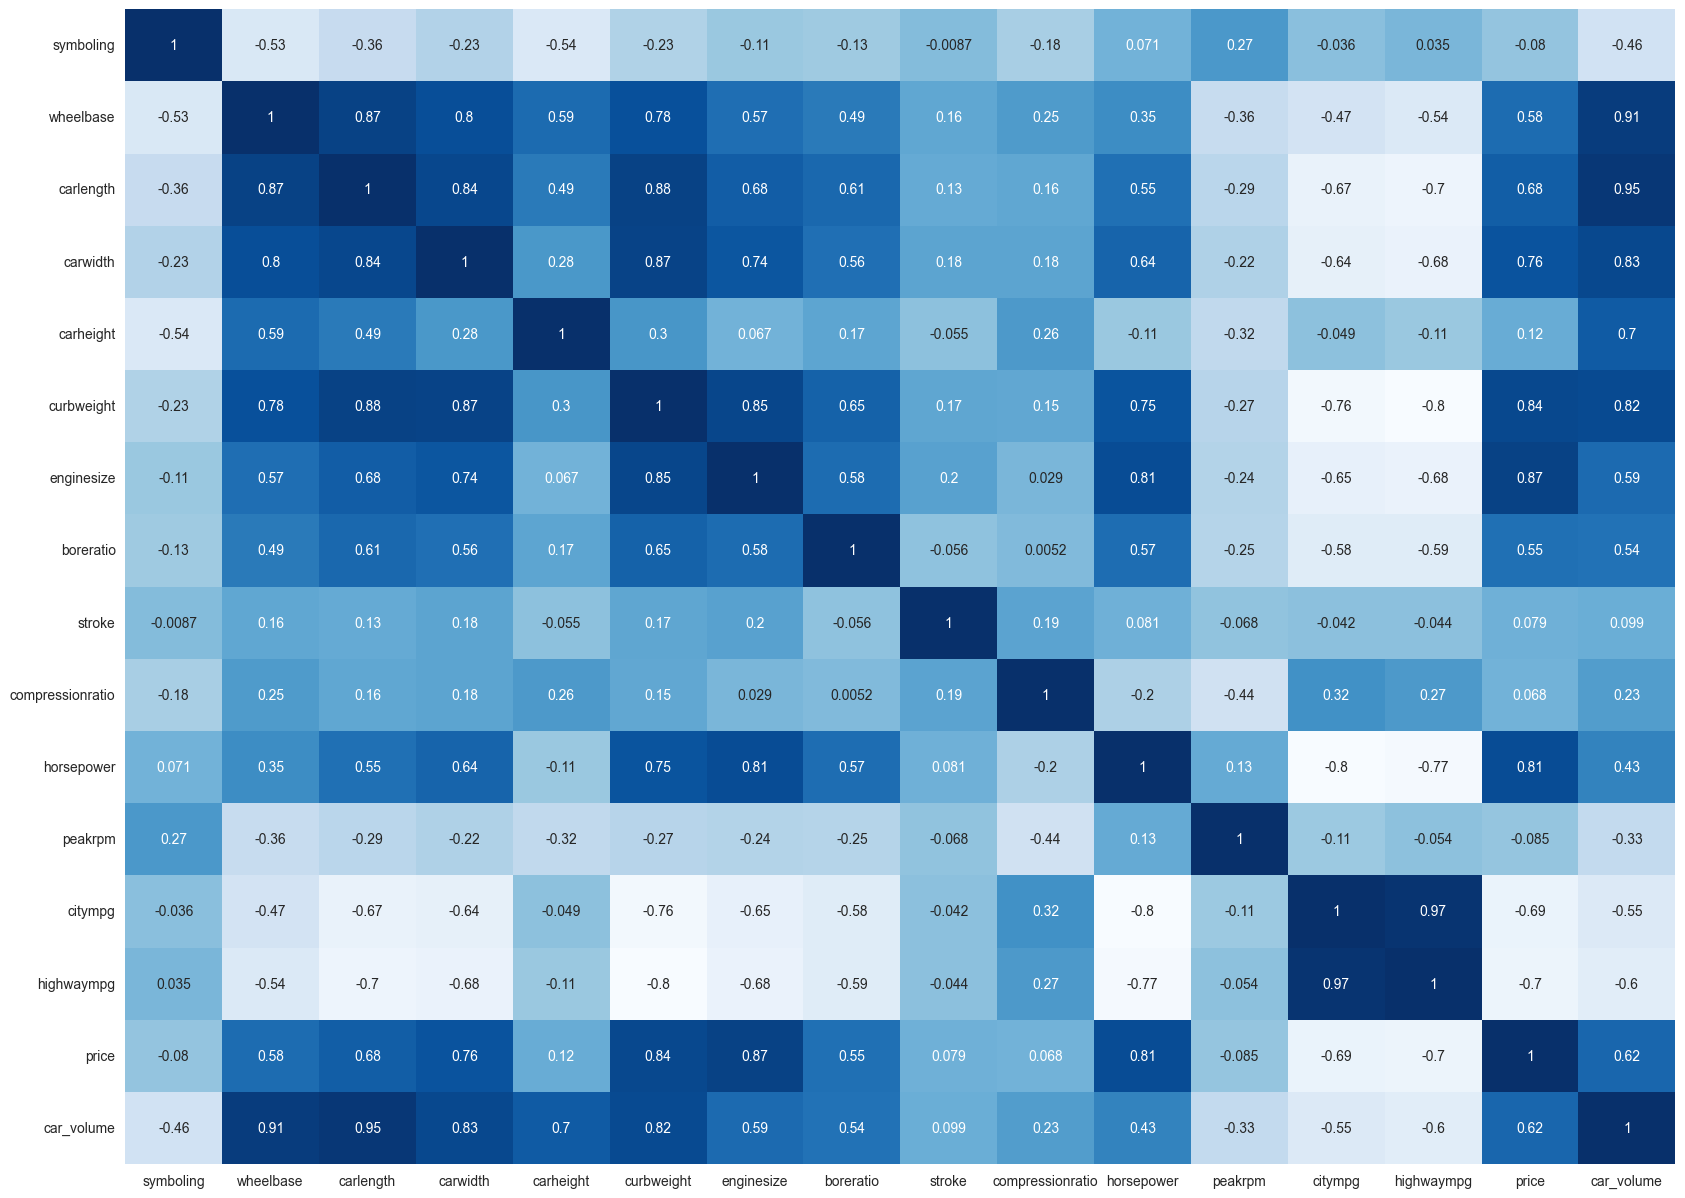

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap='Blues')


##### From The Pervious HeatMap We notice that there is some columns that does not affect the price of the car `['peakrpm','compressionratio','stroke','symboling]`   so I will Drop Them

In [27]:
df=df.drop(columns=['peakrpm','compressionratio','stroke','symboling'],axis=1)

df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_volume
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,528019.904
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,528019.904
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,587592.640
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,634816.956
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,636734.832


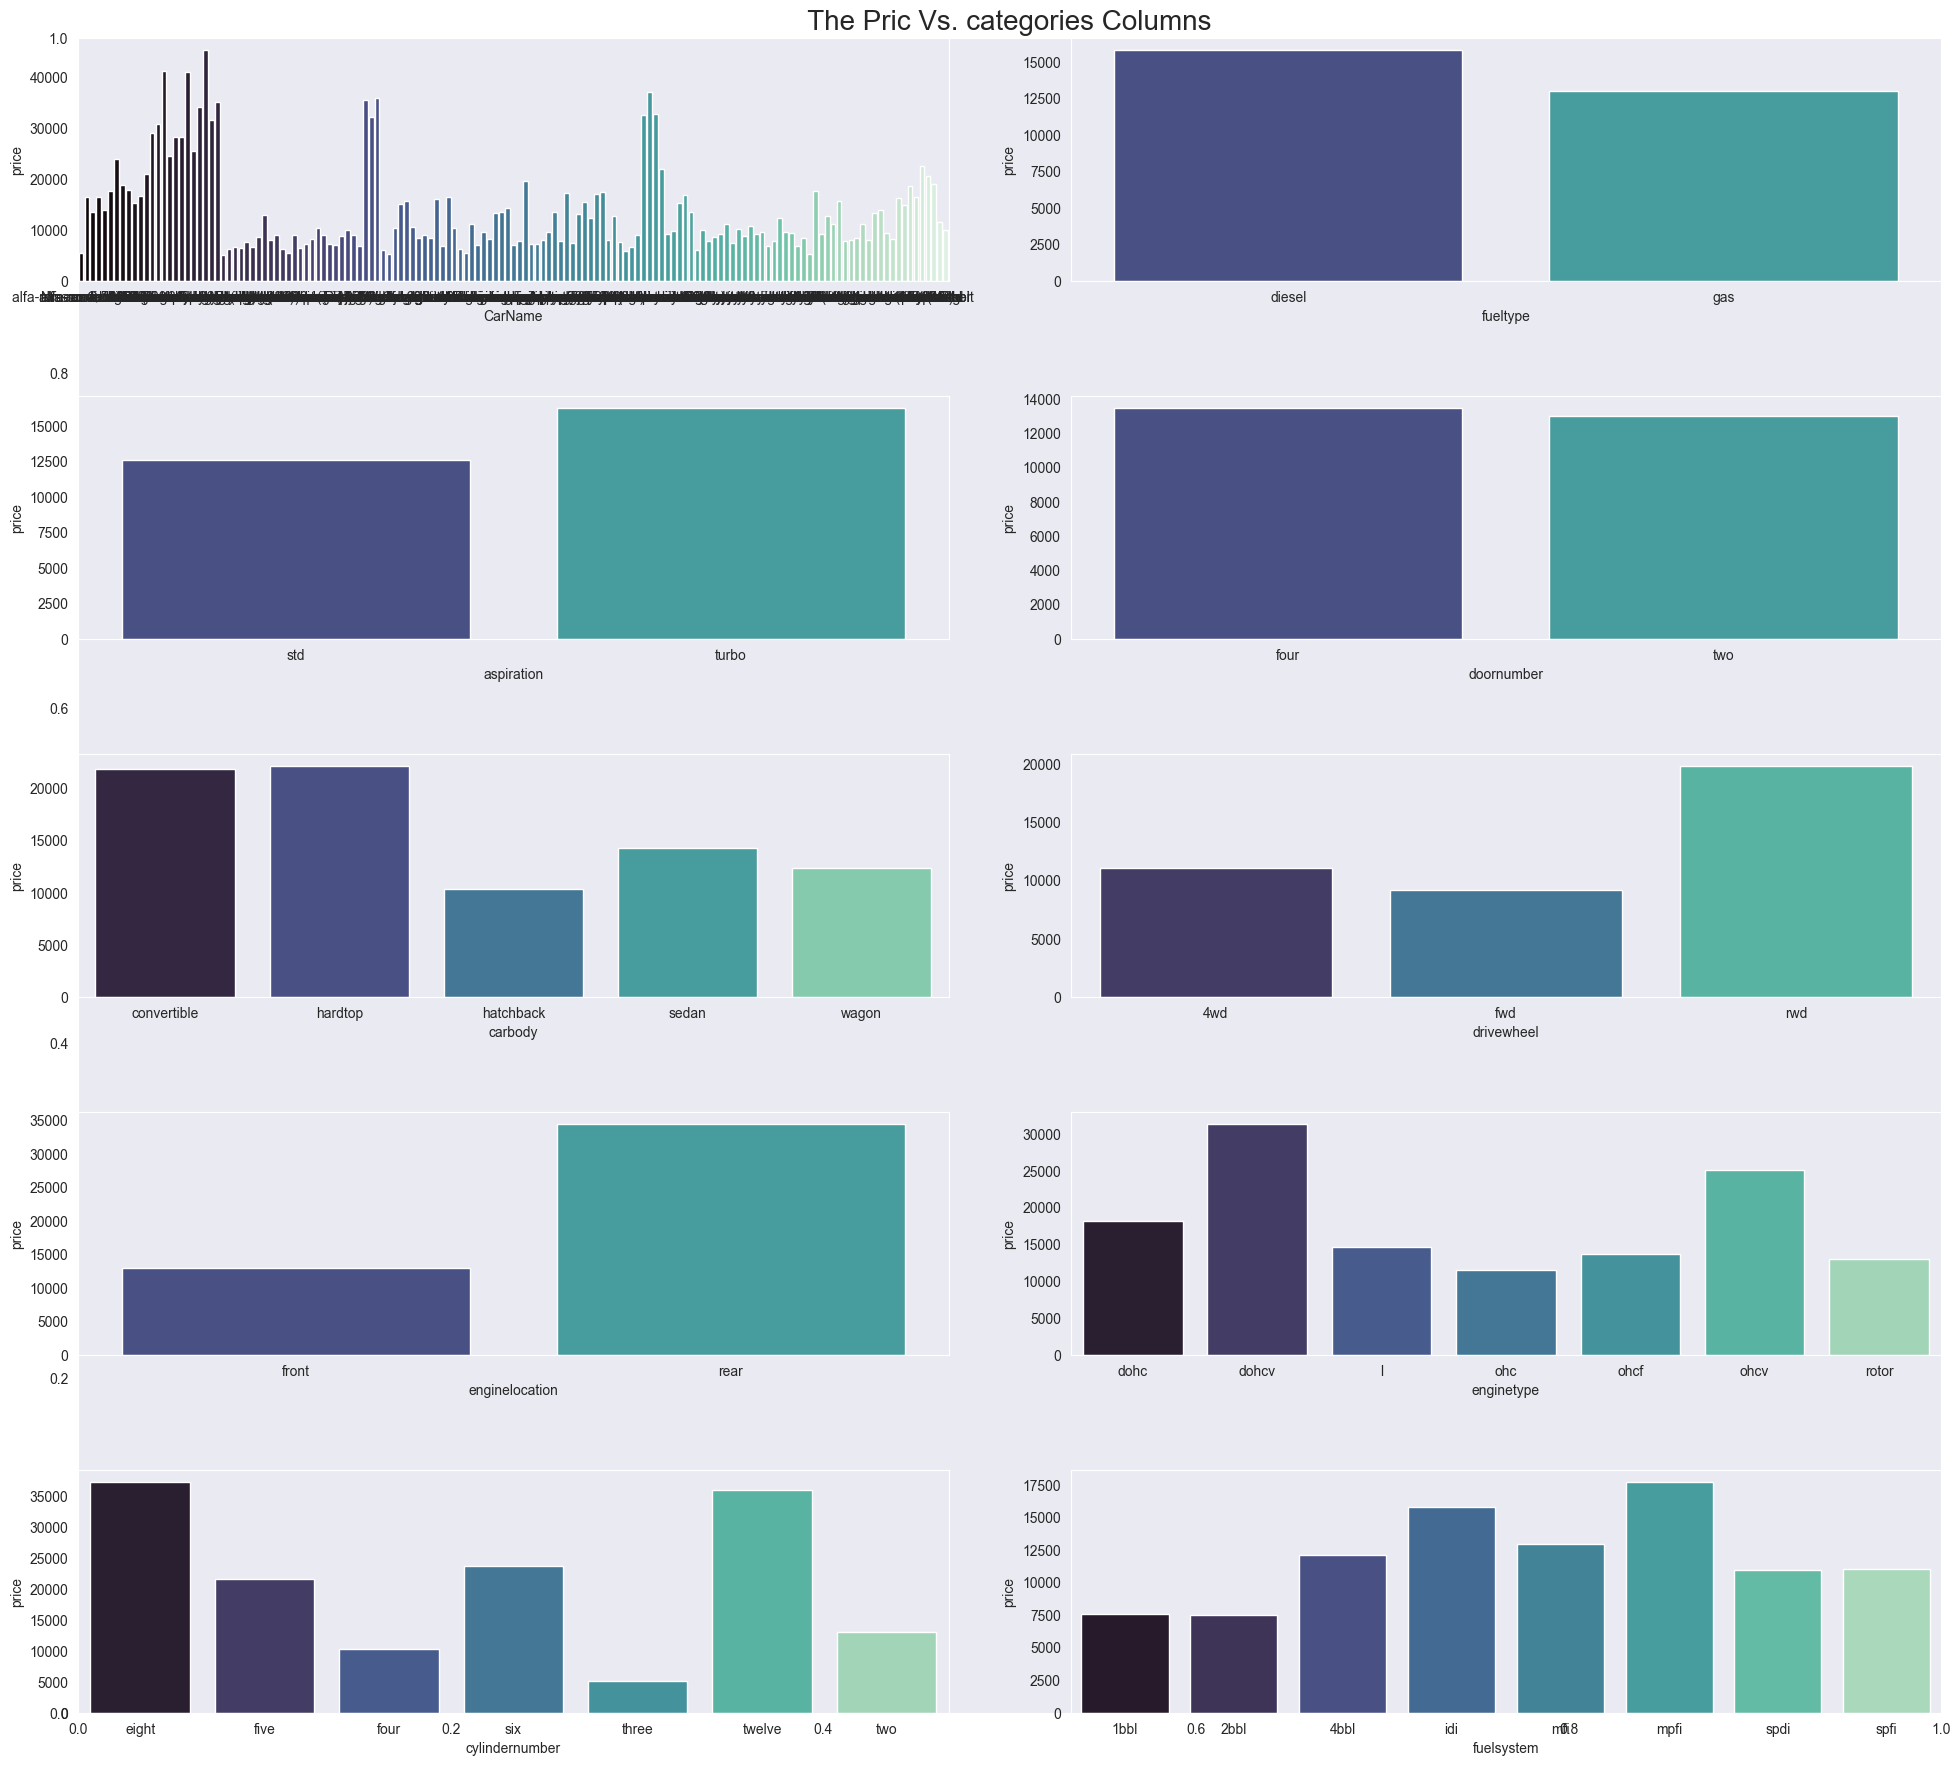

In [28]:
plt.figure(figsize=(20,18))
plt.title(" The Pric Vs. categories Columns ",size=20)
for i,col in enumerate(df[cat_col].columns,1):
    plt.subplot(5,2,i)
    sns.barplot(data=df,x=col,y='price',palette='mako',ci=None)
plt.tight_layout(w_pad=2,h_pad=5)

##### I Don't Think That is the Car Name Affect the Car Price So I will Drop The Car Name Column

# Data Pre Processing

### Split Data

In [29]:
x,y = df.drop('price',axis=1),df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [30]:

from sklearn.preprocessing import OneHotEncoder

num_col = df.select_dtypes(include=['number']).columns.drop('price')
cat_col = df.select_dtypes(include=['category']).columns.drop('CarName')

# Create a column transformer with scaling for numerical columns and one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

# Fit and transform the training data, transform the test data
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)


# Intilize The Model

In [31]:
lnr = LinearRegression()
lnr.fit(x_train_processed,y_train)

LinearRegression()

In [32]:
lnr.score(x_test_processed,y_test)*100

88.32643529135916